# Exercise 18

## Analyze class homeworks

*Andres Mauricio Obando*


In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('datasets/E18.xlsx')
data.head(10)

,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...
5,H,Siendo dos grandes software's de analítica los...,NaN,El árbol de decisión construye modelos de clas...,El objetivo de los métodos de ensemble es comb...,NaN,Gradient Boosting es una técnica de aprendizaj...
6,H,Data Scientist y Data Engineer son dos profesi...,For Machine Learning there are 3 different typ...,Decision tree is a methodology that is used to...,NaN,According to the paper 'Do we Need Hundreds of...,NaN
7,M,Las diferencias de un científico de datos y un...,El concepto Machine Learning nace de la indust...,Los arboles de decisión son una técnica fundam...,Comencemos por definir la palabra ensamble en ...,El artículo fue publicado en octubre del 2014 ...,NaN
8,H,Uno de los criterios más importantes en la sel...,Dentro de los algoritmos usados para programar...,Los arboles de decisión son estructuras de dat...,"En términos de Machine Learning, Ensemble es l...",El artículo “¿Do we need hundreds of classifie...,"Dentro de los algoritmos de “ensembling”, más ..."
9,H,Diferencia entre un científico de datos y un i...,El aprendizaje de máquinas tiene cuatro grande...,Los tipos de algoritmos y aplicaciones de árbo...,El aprendizaje conjunto es una herramienta que...,Este papper trata de encontrar a través 121 co...,Gradient Boosting su técnica consiste en entre...


# Exercise 18.1

Analyze the writing patterns of each student

Mirar qué es lo que mas se repite. (palabras, ngrama, etc)

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score
import operator

In [3]:
X = data.drop(['Sexo'], axis=1)

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
T1    41 non-null object
T2    30 non-null object
T3    30 non-null object
T4    36 non-null object
T5    35 non-null object
T6    29 non-null object
dtypes: object(6)
memory usage: 2.0+ KB


Searching the atributes from each student

From each student, extract all the homeworks in one per student:

In [5]:
X.fillna(value=' ', inplace=True)

In [6]:
X['All_Text'] = X.iloc[0:].apply(lambda x : '{}\n{}\n{}\n{}\n{}\n{}'.format(x[0],x[1],x[2],x[3],x[4],x[5]), axis=1)

In [7]:
X['All_Text'].head(10)

0    Un científico de datos y un ingeniero de datos...
1    Aunque los dos perfiles cuentan con habilidade...
2    Python vs Stata. Analizar información es un pr...
3    Los algoritmos de machine learning buscan pred...
4    Python vs R para análisis de datos. A pesar de...
5    Siendo dos grandes software's de analítica los...
6    Data Scientist y Data Engineer son dos profesi...
7    Las diferencias de un científico de datos y un...
8    Uno de los criterios más importantes en la sel...
9    Diferencia entre un científico de datos y un i...
Name: All_Text, dtype: object

In [8]:
X.head(6)

,T1,T2,T3,T4,T5,T6,All_Text
0,Un científico de datos y un ingeniero de datos...,,Los árboles de decisión es uno de los algoritm...,,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...,Un científico de datos y un ingeniero de datos...
1,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...,Aunque los dos perfiles cuentan con habilidade...
2,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...,Python vs Stata. Analizar información es un pr...
3,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,,Los algoritmos de machine learning buscan pred...
4,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...,Python vs R para análisis de datos. A pesar de...
5,Siendo dos grandes software's de analítica los...,,El árbol de decisión construye modelos de clas...,El objetivo de los métodos de ensemble es comb...,,Gradient Boosting es una técnica de aprendizaj...,Siendo dos grandes software's de analítica los...


In [9]:
r=0
df2 =pd.DataFrame(data=[], columns = ['word','frec', 'stud'])
for student in range(X.shape[0]):
    X1 = X.iloc[student,6]
    vect = CountVectorizer(lowercase=True)
    X_dtm = vect.fit_transform([X1])
    miDic = vect.vocabulary_
    a = sorted(miDic.items(), key=operator.itemgetter(1), reverse=True)
    for elem in range(5):
        df2.loc[r] =[a[0:5][elem][0], float(a[0:5][elem][1]) , student]
        r+=1
df2.head()

,word,frec,stud
0,último,716.0,0
1,última,715.0,0
2,óptimo,714.0,0
3,índice,713.0,0
4,áreas,712.0,0


In [10]:
df3=pd.pivot_table(df2,index=["word", "stud"],values=["frec"])

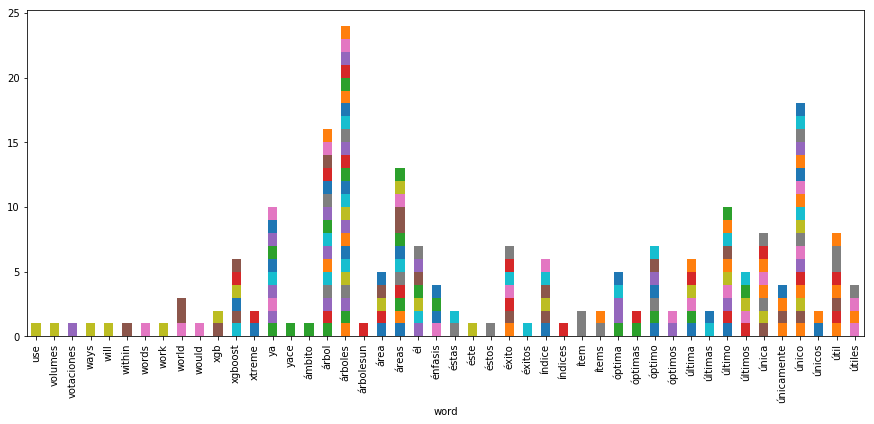

In [11]:
#df3.plot(kind = "bar",figsize=(15,6),rot = 90, stacked=True)
df2.groupby(['word','stud'])['frec'].size().unstack().plot(kind='bar', figsize=(15,6), stacked=True, legend=False)

Is possible to see that the words more comun used by the students are: árboles, áreas, único, último, and other with similarty on root.

# Exercise 18.2

Evaluate the similarities of the homeworks of the students

tip: https://github.com/orsinium/textdistance

Una forma es cluster y pasar a dos dimensiones con PCA, por ejemplo. Graficar cada usuario como puntos, de la vectorización, mirar stopwords, ngramas, etc. Luego calcular distancias euclidianas
Calcular distancia entre usuarios. 

A simple way to evaluate the similarities of two homeworks is to compare the words is using the library textdistance, to measure the distance between texts and calculate de similarity.

In [12]:
from textdistance import hamming as hm

For each homework must be devolped a comparisson with each student, so, that makes a matrix for the scores:

In [13]:
# Let's define a function for this:
def similarity(data):
    data=pd.DataFrame(data=data)
    results = pd.DataFrame(0, index=data.index, columns=data.index)
    
    # your code in here
    for i, row in data.iterrows():
        A = str(row)
        for j,row in data.iterrows():
            B = str(row)
            # I used the library difflib to calculate the ratio of similarity, where 1 are completly equal
            # and 0 both text are completly differents. A number beetwen 0 and 1 is the grade of similarity.
            C = hm.normalized_similarity(A,B)
            #results.iloc[i,j] = C.ratio()
            results.iloc[i,j] = C
    
    assert results.shape == (data.shape[0], data.shape[0])
    return results

In [14]:
T1=similarity(X.T1).to_numpy()

In [15]:
# Searching the highers similarities on homework 1.
stud = pd.DataFrame(data=[], columns=['Homework','stud1','stud2','similarity'])
sim_range = 0.7
homework = ['T1','T2','T3','T4','T5','T6']
k=0
for home in homework:
    T = similarity(X[home]).to_numpy()
    for i in range(len(T)):
        for j in range(len(T[i])):
            if (i != j) & (T[i][j] > sim_range):
                if k==0:
                    stud.loc[k]=[home,i,j,T[i][j]]
                    k+=1
                else:
                    if  not(i in stud['stud2'].unique()):
                        stud.loc[k]=[home,i,j,T[i][j]]
                        k+=1
stud

,Homework,stud1,stud2,similarity
0,T1,9,36,0.746835
1,T1,22,34,0.734177
2,T1,22,35,0.746835
3,T2,0,5,0.966667
4,T2,14,15,0.967742
5,T2,14,19,0.967742
6,T2,14,22,0.935484
7,T2,14,24,0.967742
8,T2,14,27,0.935484
9,T2,14,28,0.935484


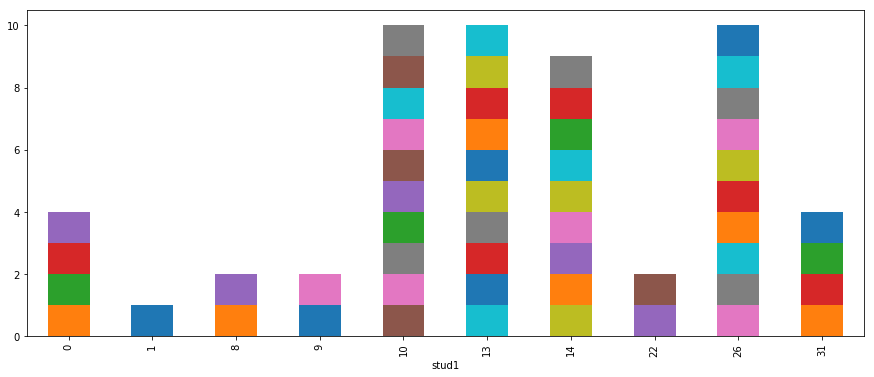

In [16]:
stud.groupby(['stud1','stud2'])['Homework'].size().unstack().plot(kind='bar', figsize=(15,6), stacked=True, legend=False)

It's possible infer to the students 10, 13, 14 and 26 has too much similarity with others student's homeworks, let's see one example with the highest similarity:

In [17]:
stud[stud['similarity']==np.max(stud['similarity'])]

,Homework,stud1,stud2,similarity
42,T5,31,21,0.987342


In [18]:
X.iloc[31,4],'\n\n',X.iloc[21,4]

('Cuando se comienza a explorar en el mundo del modelamiento matemático, se suele asociar a los modelos de redes neuronales como los de mayor acierto (o accuracy) dada su complejidad tanto de entendimiento como de procesamiento al momento de clasificar parametrías específicos en un dataset, sin embargo, tanto la teoría académica y la practica empírica ha demostrado que modelos un poco más “sencillo”, si se permite la palabra, logran tener una capacidad predictiva más alta, con menor esfuerzo. Una razón importante por lo que por un lado tienen mejor comportamiento y por otro son preferidos por los analistas de datos, es que conceptos tradicionales como heterocedasticidad, autocorrelación o multicolinealidad, no son supuestos que se deban superar en este tipo de modelos, lo que ahorra tiempo y energías en la elaboración del modelo. Ahora bien, los modelos que conocemos como tradicionales, a pesar de sus limitaciones, permiten una clara interpretabilidad de los resultados y por lo tanto u

In this case, the first part from homework T5 for the student 21 is the same for the student 31

# Exercise 18.3

Create a classifier to predict the sex of each student



Por signos de puntuación, contarlos.  
Uso de adjetivos. Con una variable, contar si usa o no.  
Hacer Oversampling a la matriz vectorizada  
Uso de tíldes

In [19]:
X = data.drop(['Sexo'], axis=1)
y = data['Sexo'].map({'H':1,'M':0})

In [20]:
X['All_Text'] = X.iloc[0:].apply(lambda x : '{}\n{}\n{}\n{}\n{}\n{}'.format(x[0],x[1],x[2],x[3],x[4],x[5]), axis=1)
all_text = X['All_Text']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_union
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [22]:
word_vectorizer = TfidfVectorizer(
    stop_words = 'english',
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 1),
    )
char_vectorizer = TfidfVectorizer(
    stop_words = 'english',
    sublinear_tf=True,
    strip_accents='unicode',
    #analyzer='char',
    lowercase=True,
    analyzer='word',
    ngram_range=(1, 4),
    )
vectorizer = make_union(word_vectorizer, char_vectorizer, n_jobs=-1)

In [23]:
X_tf = vectorizer.fit_transform(all_text)

In [29]:
#X_train, X_test, y_train, y_test = train_test_split(X, y_tf, test_size=0.20, random_state=42)

classifier = LogisticRegression(solver="sag",n_jobs=-1, C= 0.85,max_iter=1000,class_weight='auto')
cv_score = np.mean(cross_val_score(classifier, X_tf, y , cv=3, scoring='roc_auc'))

print('CV score for class {} is {}'.format("onvsrest", cv_score))

CV score for class onvsrest is 0.7079124579124579
